In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')

In [2]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
df.set_index('Country',inplace=True)
years = list(map(str,range(1980,2014)))

Pie Charts

In [4]:
df_continents = df.groupby('Continent',axis=0).sum()
df_continents.head()

C:\Users\julie\AppData\Local\Temp\ipykernel_13568\3897348384.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df.groupby('Continent',axis=0).sum()


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


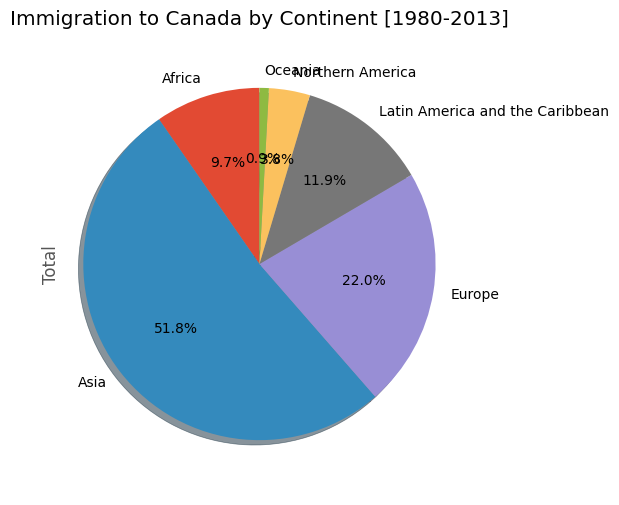

In [5]:
df_continents['Total'].plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

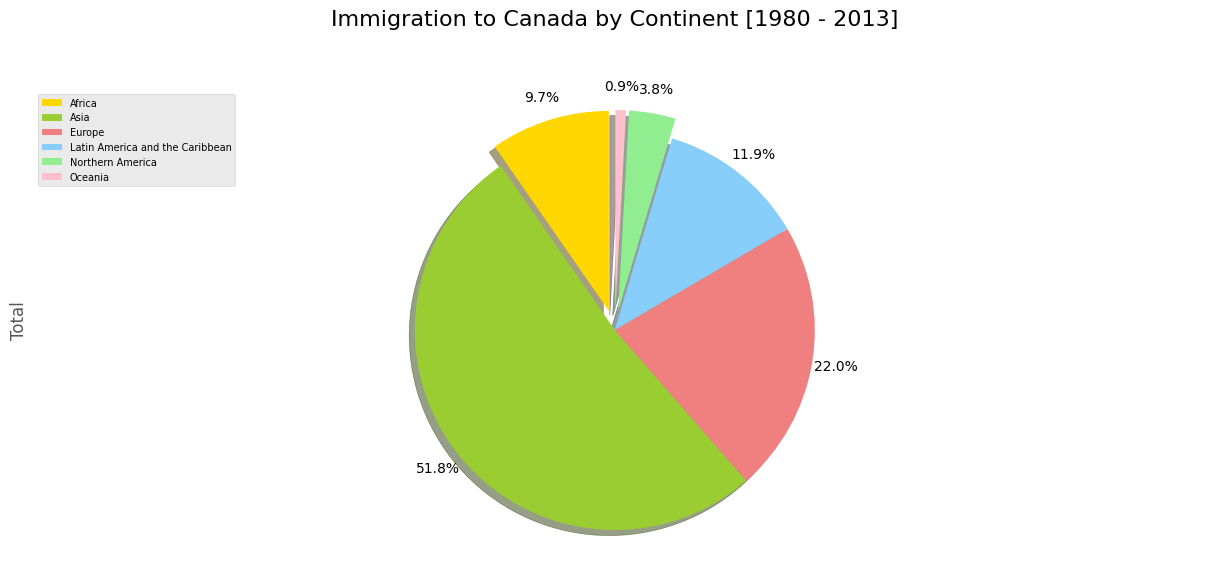

In [6]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12,fontsize=16)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7)
plt.show()

Box Plot

In [7]:
df_japan = df.loc[['Japan'],years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


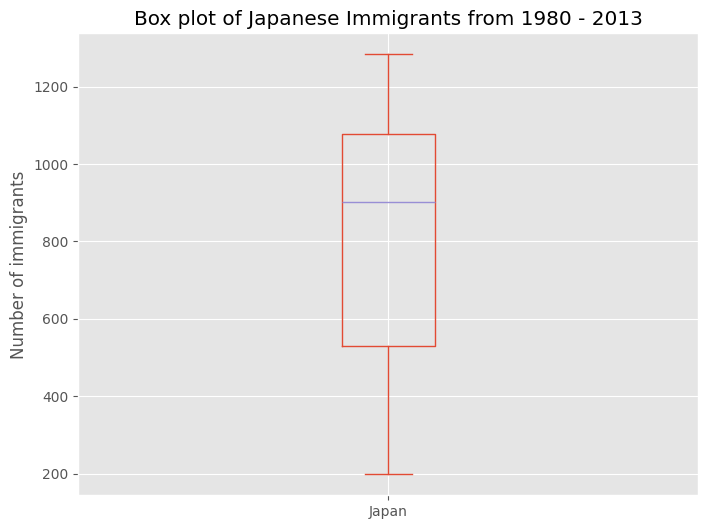

In [8]:
df_japan.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of immigrants')
plt.show()

In [9]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


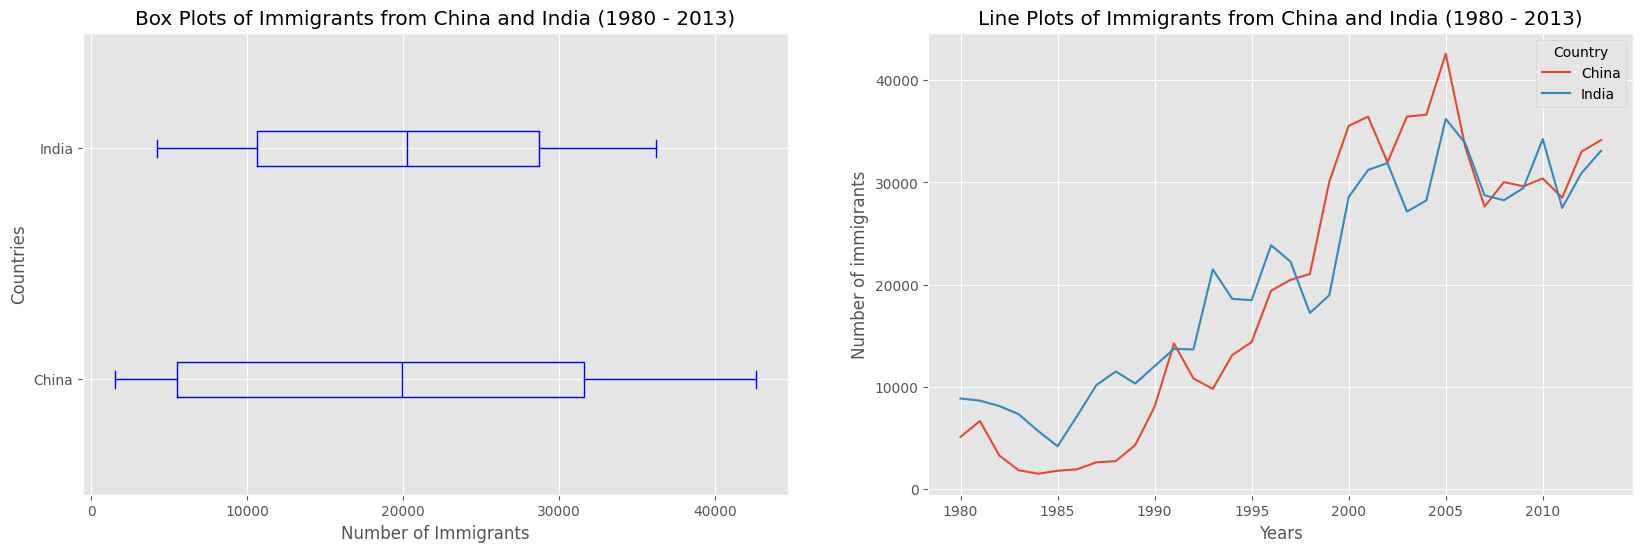

In [10]:
fig=plt.figure() # create figure
ax0=fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1=fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot)

df_CI=df.loc[['China','India'],years].transpose()
df_CI.plot(kind='box',color='blue',vert=False,figsize=(20,6),ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_CI.plot(kind='line',figsize=(20,6),ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of immigrants')
ax1.set_xlabel('Years')

plt.show()

Scatter Plot

In [11]:
df_tot=pd.DataFrame(df[years].sum(axis=0))
df_tot.index=map(int,df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['year','total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


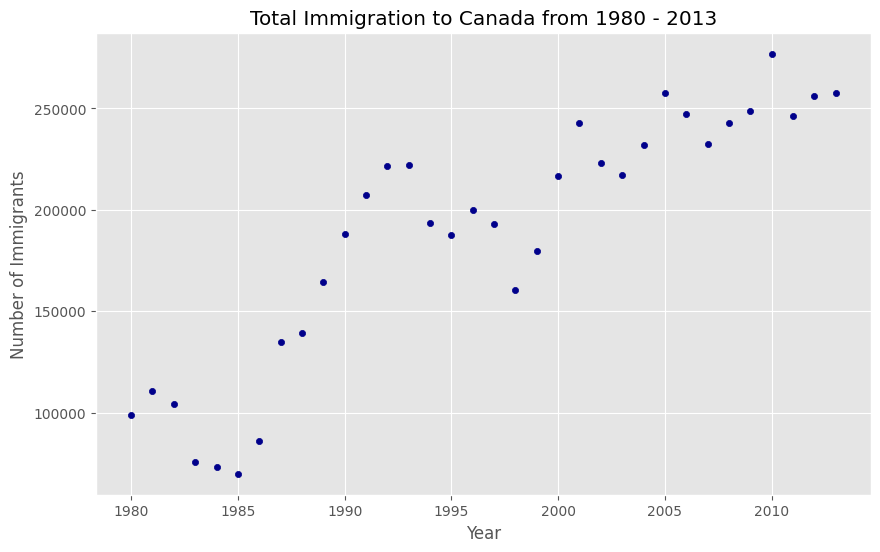

In [12]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [13]:
x=df_tot['year']
y=df_tot['total']
fit=np.polyfit(x,y,1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

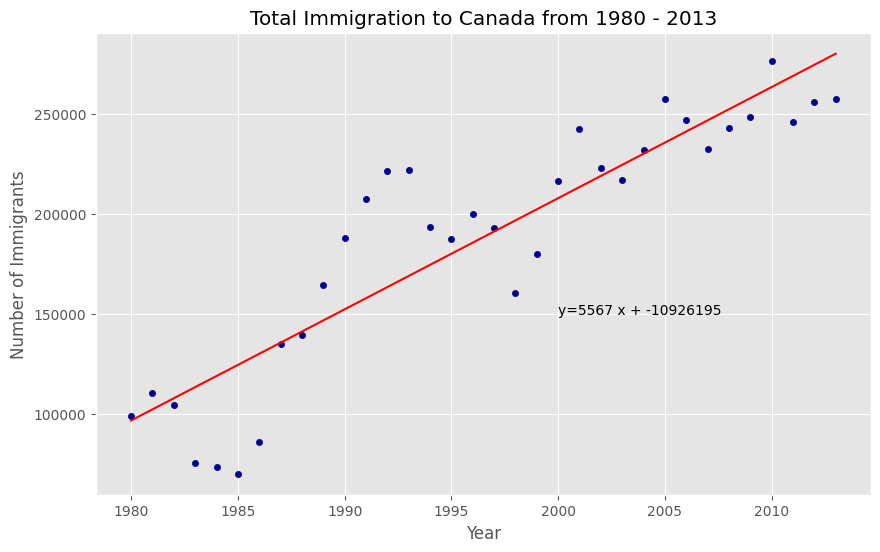

In [14]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x,fit[0]*x+fit[1],color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0],fit[1]),xy=(2000,150000))
plt.show()

In [15]:
df_can_t=df[years].transpose()
df_can_t.index=map(int,df_can_t.index)
df_can_t.index.name='Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Normalized weights

In [17]:
norm_br=(df_can_t['Brazil']-df_can_t['Brazil'].min())/(df_can_t['Brazil'].max()-df_can_t['Brazil'].min())
norm_arg=(df_can_t['Argentina']-df_can_t['Argentina'].min())/(df_can_t['Argentina'].max()-df_can_t['Argentina'].min())

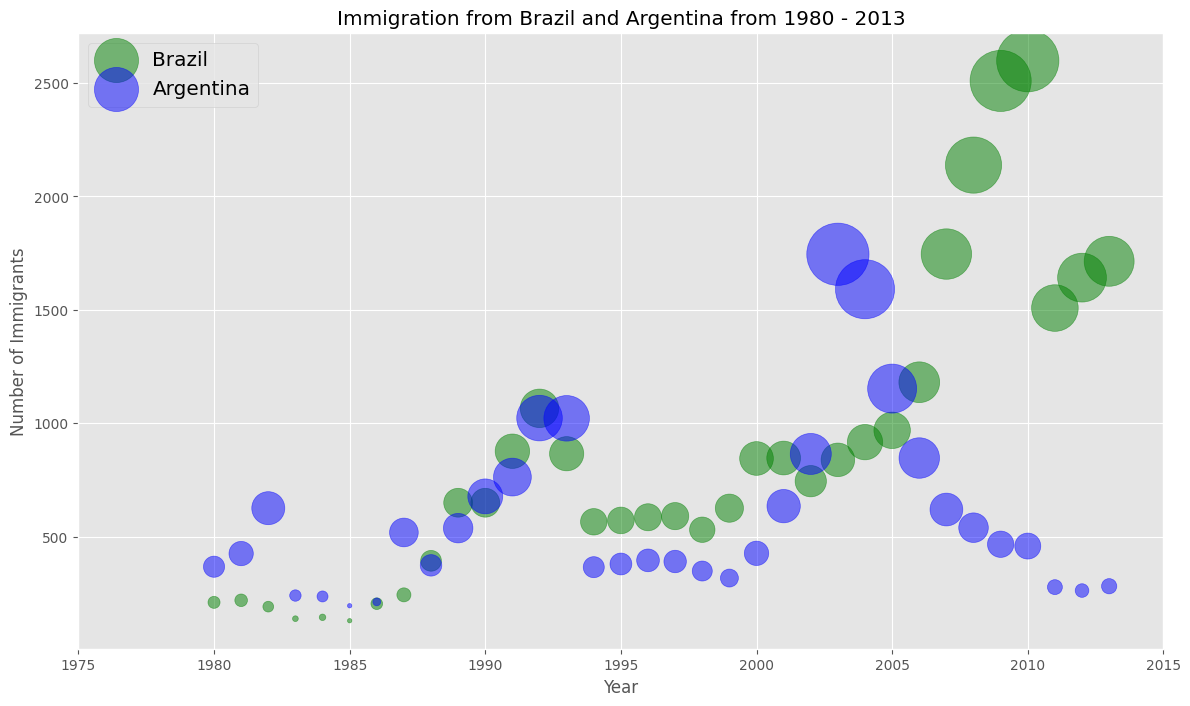

In [18]:
ax0=df_can_t.plot(kind='scatter',x='Year',y='Brazil',figsize=(14,8),alpha=0.5,color='green',s=norm_br*2000+10,xlim=(1975,2015))
ax1=df_can_t.plot(kind='scatter',x='Year',y='Argentina',alpha=0.5,color='blue',s=norm_arg*2000+10,ax=ax0)
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil','Argentina'],loc='upper left',fontsize='x-large')